In [114]:
import torch
from torch import nn, autograd, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [115]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Model, self).__init__()
        self.h1 = nn.Linear(input_size,hidden_size)
        self.h2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self, x):
        x = self.h1(x)
        x = F.tanh(x)
        x = self.h2(x)
        x = F.softmax(x)
        return x  

In [116]:
batch_size = 10
input_size = 4
hidden_size = 8
num_classes = 4

lr = 0.01 


torch.manual_seed(123)
input = autograd.Variable(torch.rand(batch_size, input_size))
print('input', input)

target = autograd.Variable((torch.rand(batch_size) *num_classes).long())
print target.view(1, -1) 

model = Model(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
opt = optim.Adam(params=model.parameters(), lr=lr)

a = list(model.parameters())
for i in range(len(a)):
    print a[i].size()


('input', Variable containing:
 0.6965  0.7130  0.2861  0.4285
 0.2269  0.6909  0.5513  0.7192
 0.7195  0.4911  0.4231  0.7800
 0.9808  0.4109  0.6848  0.5797
 0.4809  0.1400  0.3921  0.4010
 0.3432  0.6273  0.7290  0.3242
 0.4386  0.2448  0.0597  0.6948
 0.3980  0.5939  0.7380  0.6318
 0.1825  0.4403  0.1755  0.0837
 0.5316  0.7123  0.5318  0.4279
[torch.FloatTensor of size 10x4]
)
Variable containing:
    2     1     3     1     2     2     2     1     2     1
[torch.LongTensor of size 1x10]

torch.Size([8, 4])
torch.Size([8])
torch.Size([4, 8])
torch.Size([4])


-0.277599871159
-0.669941604137
-0.785729587078
-0.795860648155
-0.798380255699
-0.888571858406
-0.89644497633
-0.897992014885
-0.89865654707
-0.899020671844
-0.899247467518
-0.89940059185
-0.899510025978
-0.899591267109
-0.899653613567
-0.89970266819
-0.899742007256
-0.899774253368
-0.899800956249
-0.899823367596
-0.899842262268
-0.899858474731
-0.899872481823
-0.899884581566
-0.899895310402
-0.899904608727
-0.899912953377
-0.899920284748
-0.899926781654
-0.899932682514
Variable containing:
    0     0     0     0     0     1     0     0     0     0
[torch.LongTensor of size 1x10]



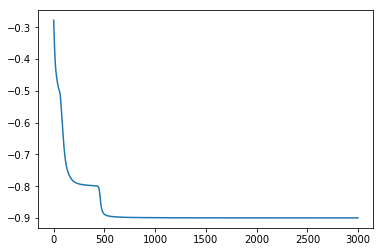

In [117]:
track_loss = []
for epoch in range(3000):
    out = model(input)
    #print('out', out)
    _, pred = out.max(1)
    #print pred.view(1,-1)
    loss = F.nll_loss(out, target)
    track_loss.append(loss.data[0])
    if epoch%100==0:
        print loss.data[0]

    model.zero_grad()
    loss.backward()
    opt.step()


print target.view(1,-1) - pred.view(1,-1)
plt.plot(track_loss)
plt.show()